In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import sparse

In [12]:
# initialize the parameters 
n = 500   # number of samples 
d = 1000  # number of dimensions
k = 100   # number of useful features

In [13]:
# generate X
X = np.random.standard_normal(size=(n,d))
# print(X.shape)

In [14]:
# initialize weights and bias
w = np.zeros(d)
b = 0
for j in range(k):
    w[j] = j/k
# print(w.shape)

In [15]:
# generate error
e = np.random.normal(0, 1, n)
# print(e.shape)

In [16]:
# generate y
y = np.dot(X,w)+ b + e
# print(y.shape)

In [19]:
# calculate the max lambd
lambd = []
for k in range(d):
    for i in range(n):
        l= 2*np.sum(X[i][k]*(y[i] - (1/n) * np.sum(y[i])))
    lambd.append(l)
lambd_max = np.max(lambd)
# print(lambd_max)

72.64575408390897


In [20]:
# Calculate the sum of squared error
rss = lambda X, y, w: np.dot((y - np.dot(X,w)).T,(y - np.dot(X,w)))

In [21]:
def lasso_regression(X, y, b, w, lambd, K,threshold=0.1):
    ''' 
    Using coordinate descent method to get 
    the Lasso regression coefficient
    '''
    m, n = X.shape 
    r = rss(X, y, w)
    # w = np.ones(n)
    lambdavalues = []
    lossvalues = []
    nonzeroes = []
    precisionVal = []
    recallVal = []
    w_list = []
    
    # Using coordinate descent method to optimize the regression coefficient
    # niter = itertools.count(1)
    for it in range(10):        
        
        #STEP 1: Update b
        b = 0
        for i in range(m):
            b += y[i] - np.sum(np.dot(w,X[i,:]))
        b = b/m
        # print(b)
 
        for k in range(n):
            
            #STEP 2: calculate ak    
            ak = 2 * (np.sum(X**2, axis = 0)) 

            #STEP 3: Calculate ck
            ck = 0
            for i in range(m):
                ck += X[i, k]*(y[i] - (b + sum((np.dot(w[j],X[i,j])for j in range(n) if j != k))))
            ck = 2*ck
            
            #STEP 4: Update w[k]
            if ck < -lambd:
                wk = (ck + lambd)/ak[k]
            elif ck > lambd:
                wk = (ck - lambd)/ak[k]
            else :
                wk = 0

            # get new regression coefficient
            w[k] = wk
        w_list.append(w)
        r_prime = rss(X, y, w)
        #print("max of w:",np.max(w))
        #print("min of w:",np.min(w))
        #Loss
        er = np.dot(X,w) + b - y
        square_er = np.square(er)
        sum_er = np.sum(square_er)
        #print("sum_error:",sum_er)
        loss = sum_er + lambd * (np.sum(np.absolute(w)))
        print("Loss: ",loss)
        
        #lambd values for graph
        lambdavalues.append(lambd)
        # print("lambd:",lambd)
        lambd = lambd/1.5
        #nonzeroes weights
        #print(np.count_nonzero(w))
        #print(np.count_nonzero(w[:K]))
        nonzeroes.append(np.count_nonzero(w))
        #print(float(np.count_nonzero(w)))
        
        #precision
        precision = np.count_nonzero(w[:K])*1./float(np.count_nonzero(w))
        #print("precision:",precision)
        if np.count_nonzero(w) != 0:
            precisionVal.append(precision)
        else:
            precisionVal.append(1)
        
        #recall
        recall = np.count_nonzero(w[:K])/float(K)
        #print("recall:",recall)
        recallVal.append(recall)       
        
        #set a stopping condition
        r_prime = rss(X, y, w)
        delta = abs(r_prime - r)
        r = r_prime
        if delta < threshold:
            break
    return lambdavalues, lossvalues, nonzeroes, w, b, precisionVal, recallVal,w_list

In [22]:
lambdavalues, lossvalues, nonzeroes, W_f, b_f, precisionVal, recallVal,w_list = lasso_regression(X, y, b, w, lambd_max, k, threshold=0.1)

Loss:  3743.736186706789
Loss:  2610.3150499123467
Loss:  1823.4906075205827
Loss:  1267.60613396889
Loss:  875.4362829510036
Loss:  600.8741004450793
Loss:  410.1543174978339
Loss:  278.5912205233493
Loss:  188.37655836009682
Loss:  126.87353943132452


In [23]:
# calculate precision and recall 
Sparsity_Pattern = np.count_nonzero(W_f)
precision = np.count_nonzero(W_f[:k])*1./float(np.count_nonzero(W_f))
recall = np.count_nonzero(W_f[:k])/float(k)

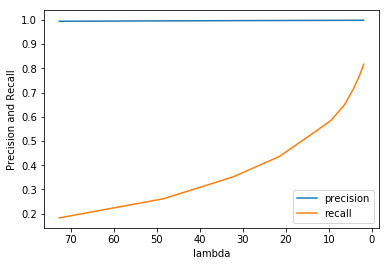

In [24]:
# plot precision and recall  
plt.plot(lambdavalues, precisionVal, label="precision")
plt.plot(lambdavalues, recallVal, label="recall")
plt.xlabel("lambda")
plt.ylabel("Precision and Recall")
plt.legend()
axis = plt.gca()
axis.set_xlim(axis.get_xlim()[::-1])

plt.show()

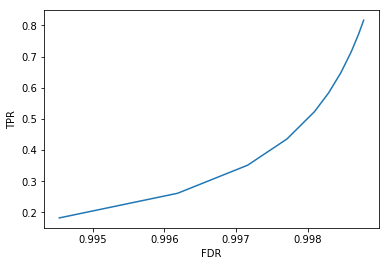

In [25]:
# plot FDR and TPR  
plt.plot(precisionVal, recallVal)
plt.xlabel("FDR")
plt.ylabel("TPR")
plt.show()
# plt.legend()

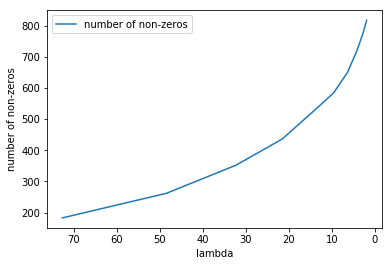

In [30]:
# plot the relation between number of non-zeros and lambd values
plt.plot(lambdavalues, nonzeroes, label="number of non-zeros")
plt.xlabel("lambda")
plt.ylabel("number of non-zeros")
plt.legend()
#plt.xscale('log')
axis = plt.gca()
axis.set_xlim(axis.get_xlim()[::-1])
plt.show()

In [29]:
#Stack into numpy array
w_stack = np.stack(w_list).T
m,n = w_stack.shape
print(m,n)

1000 10


Text(0.5, 1.0, 'Lasso Coefficients')

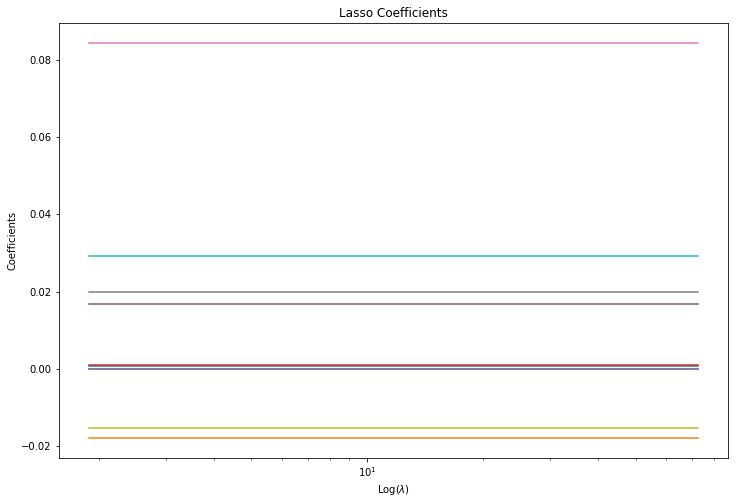

In [28]:
# plot the coffecients 
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lambdavalues, w_stack[i], label = i)
plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients')
# plt.legend()
# plt.axis('tight')